# Using matplotlib styles

In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
sorted(mpl.style.available)

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [6]:
def doplot():
    fig, ax = plt.subplots(1, 1, figsize=(5, 5))
    t = np.linspace(-2 * np.pi, 2 * np.pi, 1000)
    x = np.linspace(0, 14, 100)
    for i in range(1, 7):
        ax.plot(x, np.sin(x + i * .5) * (7 - i))
    return ax

<AxesSubplot:>

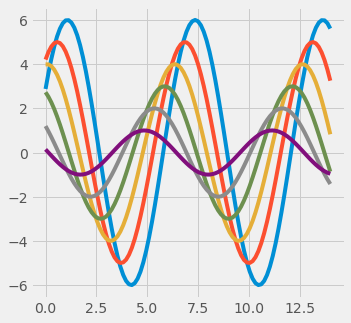

In [9]:
mpl.style.use('fivethirtyeight')
doplot()

# 6.2. Creating statistical plots easily with seaborn

In [1]:
import seaborn as sns

tips = sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


/Users/mranger/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


NameError: name 'stats' is not defined

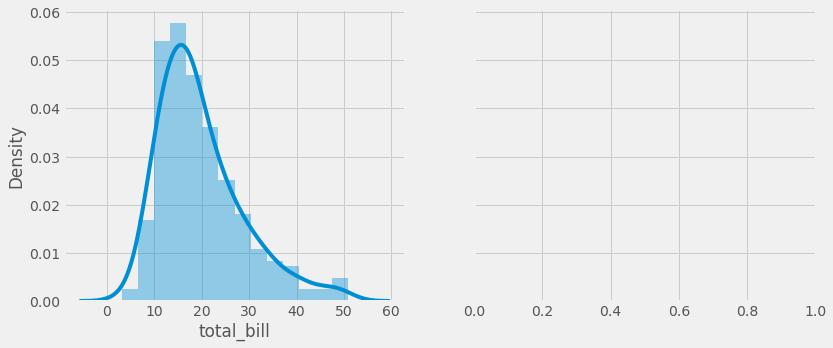

In [12]:
# We create two subplots sharing the same y axis.
f, (ax1, ax2) = plt.subplots(1, 2,
                       figsize=(12, 5),
                       sharey=True)

# Left subplot.
# Histogram and KDE (active by default).
sns.distplot(tips.total_bill,
             ax=ax1,
             hist=True)

# Right subplot.
# "Rugplot", KDE, and gamma fit.
sns.distplot(tips.total_bill,
             ax=ax2,
             hist=False,
             kde=True,
             rug=True,
             fit=stats.gamma,
             fit_kws=dict(label='gamma'),
             kde_kws=dict(label='kde'))
ax2.legend()

In [ ]:
sns.regplot(x="total_bill", y="tip", data=tips)

/Users/mranger/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 15.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='sex', ylabel='tip'>

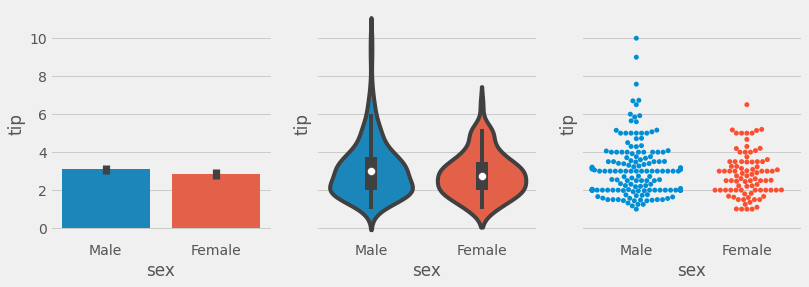

In [13]:
f, (ax1, ax2, ax3) = plt.subplots(
    1, 3, figsize=(12, 4), sharey=True)
sns.barplot(x='sex', y='tip', data=tips, ax=ax1)
sns.violinplot(x='sex', y='tip', data=tips, ax=ax2)
sns.swarmplot(x='sex', y='tip', data=tips, ax=ax3)

# My favorite: scatterplot matrix

AKA pairplot

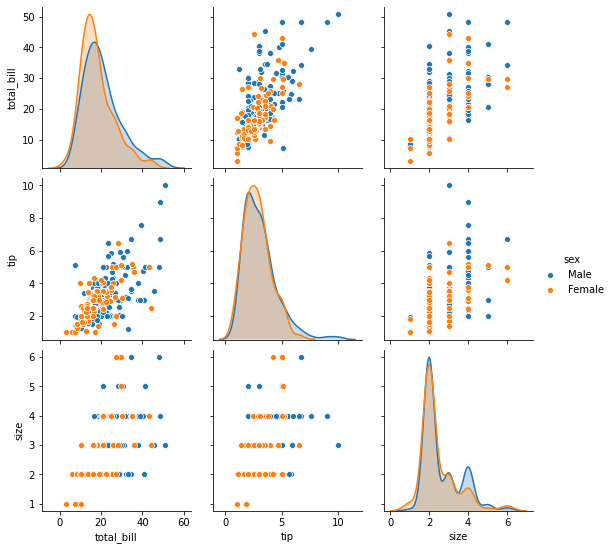

In [3]:
sns.pairplot(tips, hue='sex') #if it's both the same categorty, then it's a histogram. Otherwise scatterplot